In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rsq

import seaborn as sns

In [2]:
data=pd.read_csv('ML Data 2.csv')

X = data.drop(['PDL Status'], axis=1)
y=data['PDL Status']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [4]:
train_data = X_train.join(y_train)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6856 entries, 2127 to 1192
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Identifier    6856 non-null   int64  
 1   ST            6856 non-null   object 
 2   Pool          6856 non-null   object 
 3   Quarter       6856 non-null   int64  
 4   Year          6856 non-null   int64  
 5   Period        6856 non-null   float64
 6   Units         6856 non-null   float64
 7   Scripts       6856 non-null   int64  
 8   Total Amount  6856 non-null   float64
 9   Market Share  6856 non-null   float64
 10  PDL Status    6856 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 900.8+ KB


array([[<Axes: title={'center': 'Identifier'}>,
        <Axes: title={'center': 'Quarter'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Period'}>,
        <Axes: title={'center': 'Units'}>,
        <Axes: title={'center': 'Scripts'}>],
       [<Axes: title={'center': 'Total Amount'}>,
        <Axes: title={'center': 'Market Share'}>,
        <Axes: title={'center': 'PDL Status'}>]], dtype=object)

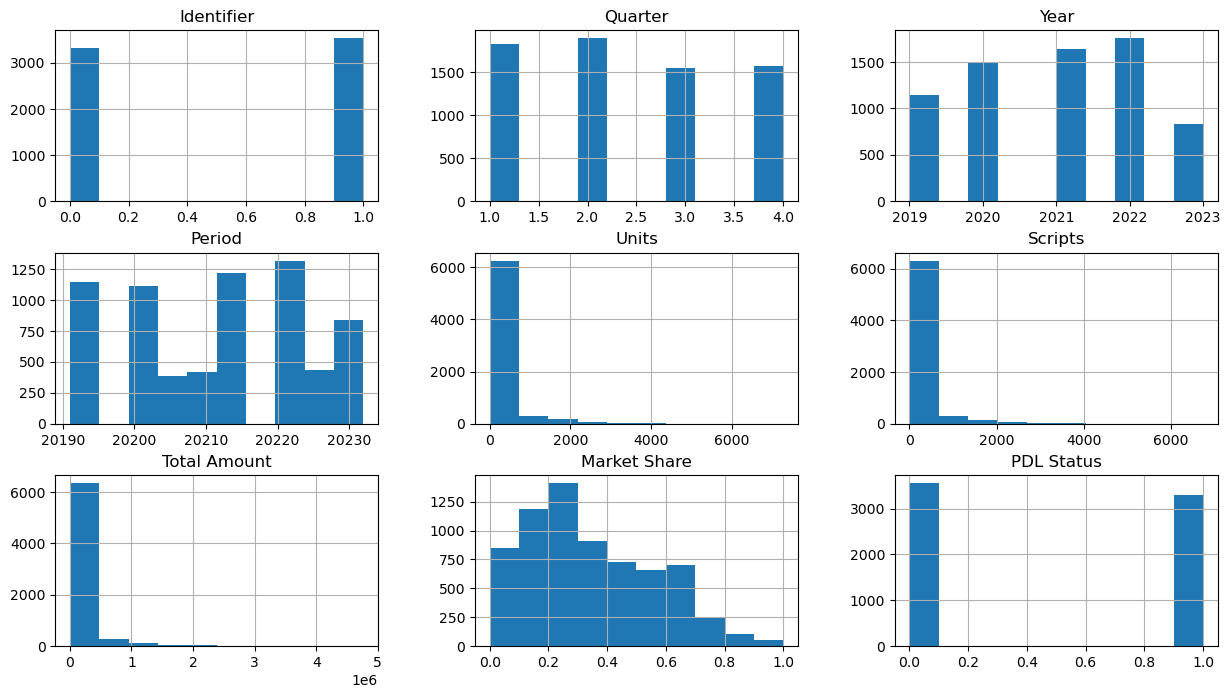

In [6]:
train_data.hist(figsize=(15,8))

<Axes: >

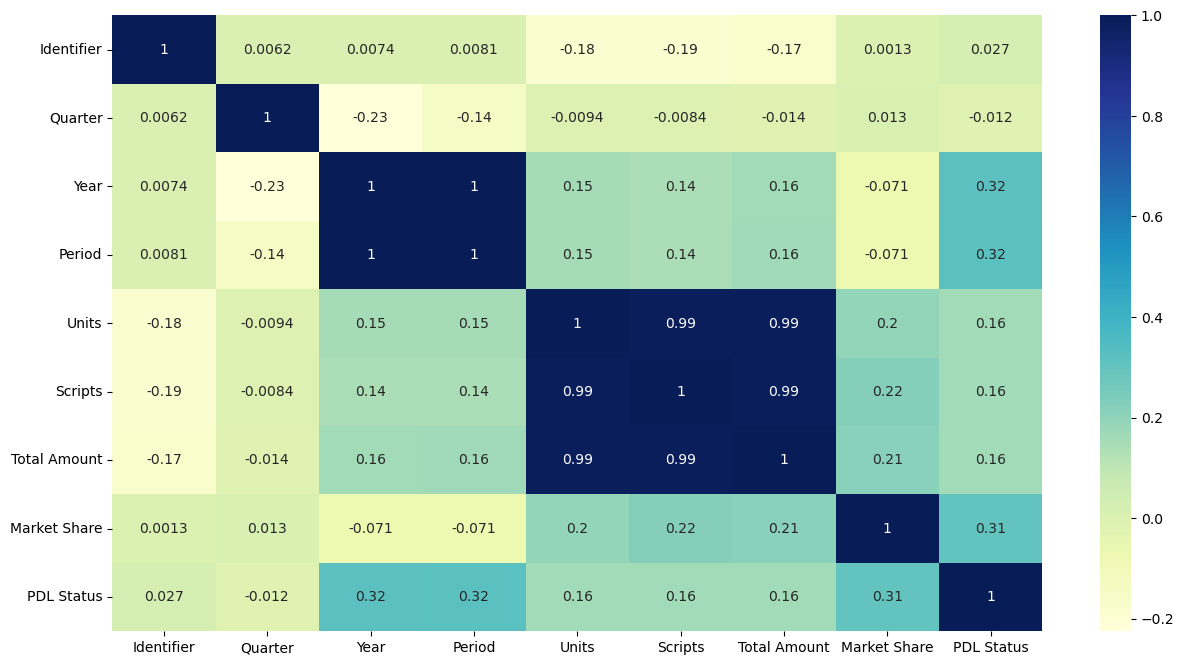

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap='YlGnBu')

In [8]:
train_data

,Identifier,ST,Pool,Quarter,Year,Period,Units,Scripts,Total Amount,Market Share,PDL Status
2127,1,NV,NMPI,2,2020,20202.0,88.0,77,52094.98,0.349030,0
2067,1,MT,NMPI,2,2020,20202.0,30.0,25,17901.33,0.106776,0
1730,0,PA,SSDC,1,2020,20201.0,297.0,229,173079.42,0.538010,1
942,1,TN,Independent,3,2019,20193.0,357.0,344,200184.66,0.221034,0
1447,0,CA,Independent,1,2020,20201.0,107.0,98,55400.00,0.363610,0
...,...,...,...,...,...,...,...,...,...,...,...
418,0,MN,NMPI,2,2019,20192.0,290.0,263,169087.79,0.473227,0
4087,0,NM,Independent,2,2021,20212.0,129.0,127,78212.30,0.585366,0
5811,0,UT,SSDC,1,2022,20221.0,26.0,25,28483.81,0.189032,0
3074,1,NM,Independent,4,2020,20204.0,14.0,14,8298.24,0.555076,0


In [9]:
train_data = train_data.join(pd.get_dummies(train_data.Pool).astype(int)).drop(['Pool'], axis=1)
train_data = train_data.join(pd.get_dummies(train_data.ST).astype(int)).drop(['ST'], axis=1)

In [10]:
test_data = X_test.join(y_test)

test_data = test_data.join(pd.get_dummies(test_data.Pool).astype(int)).drop(['Pool'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.ST).astype(int)).drop(['ST'], axis=1)

In [11]:
X_train, y_train = train_data.drop(['PDL Status'], axis=1), train_data['PDL Status']
X_test, y_test = test_data.drop(['PDL Status'], axis=1), test_data['PDL Status']

<Axes: >

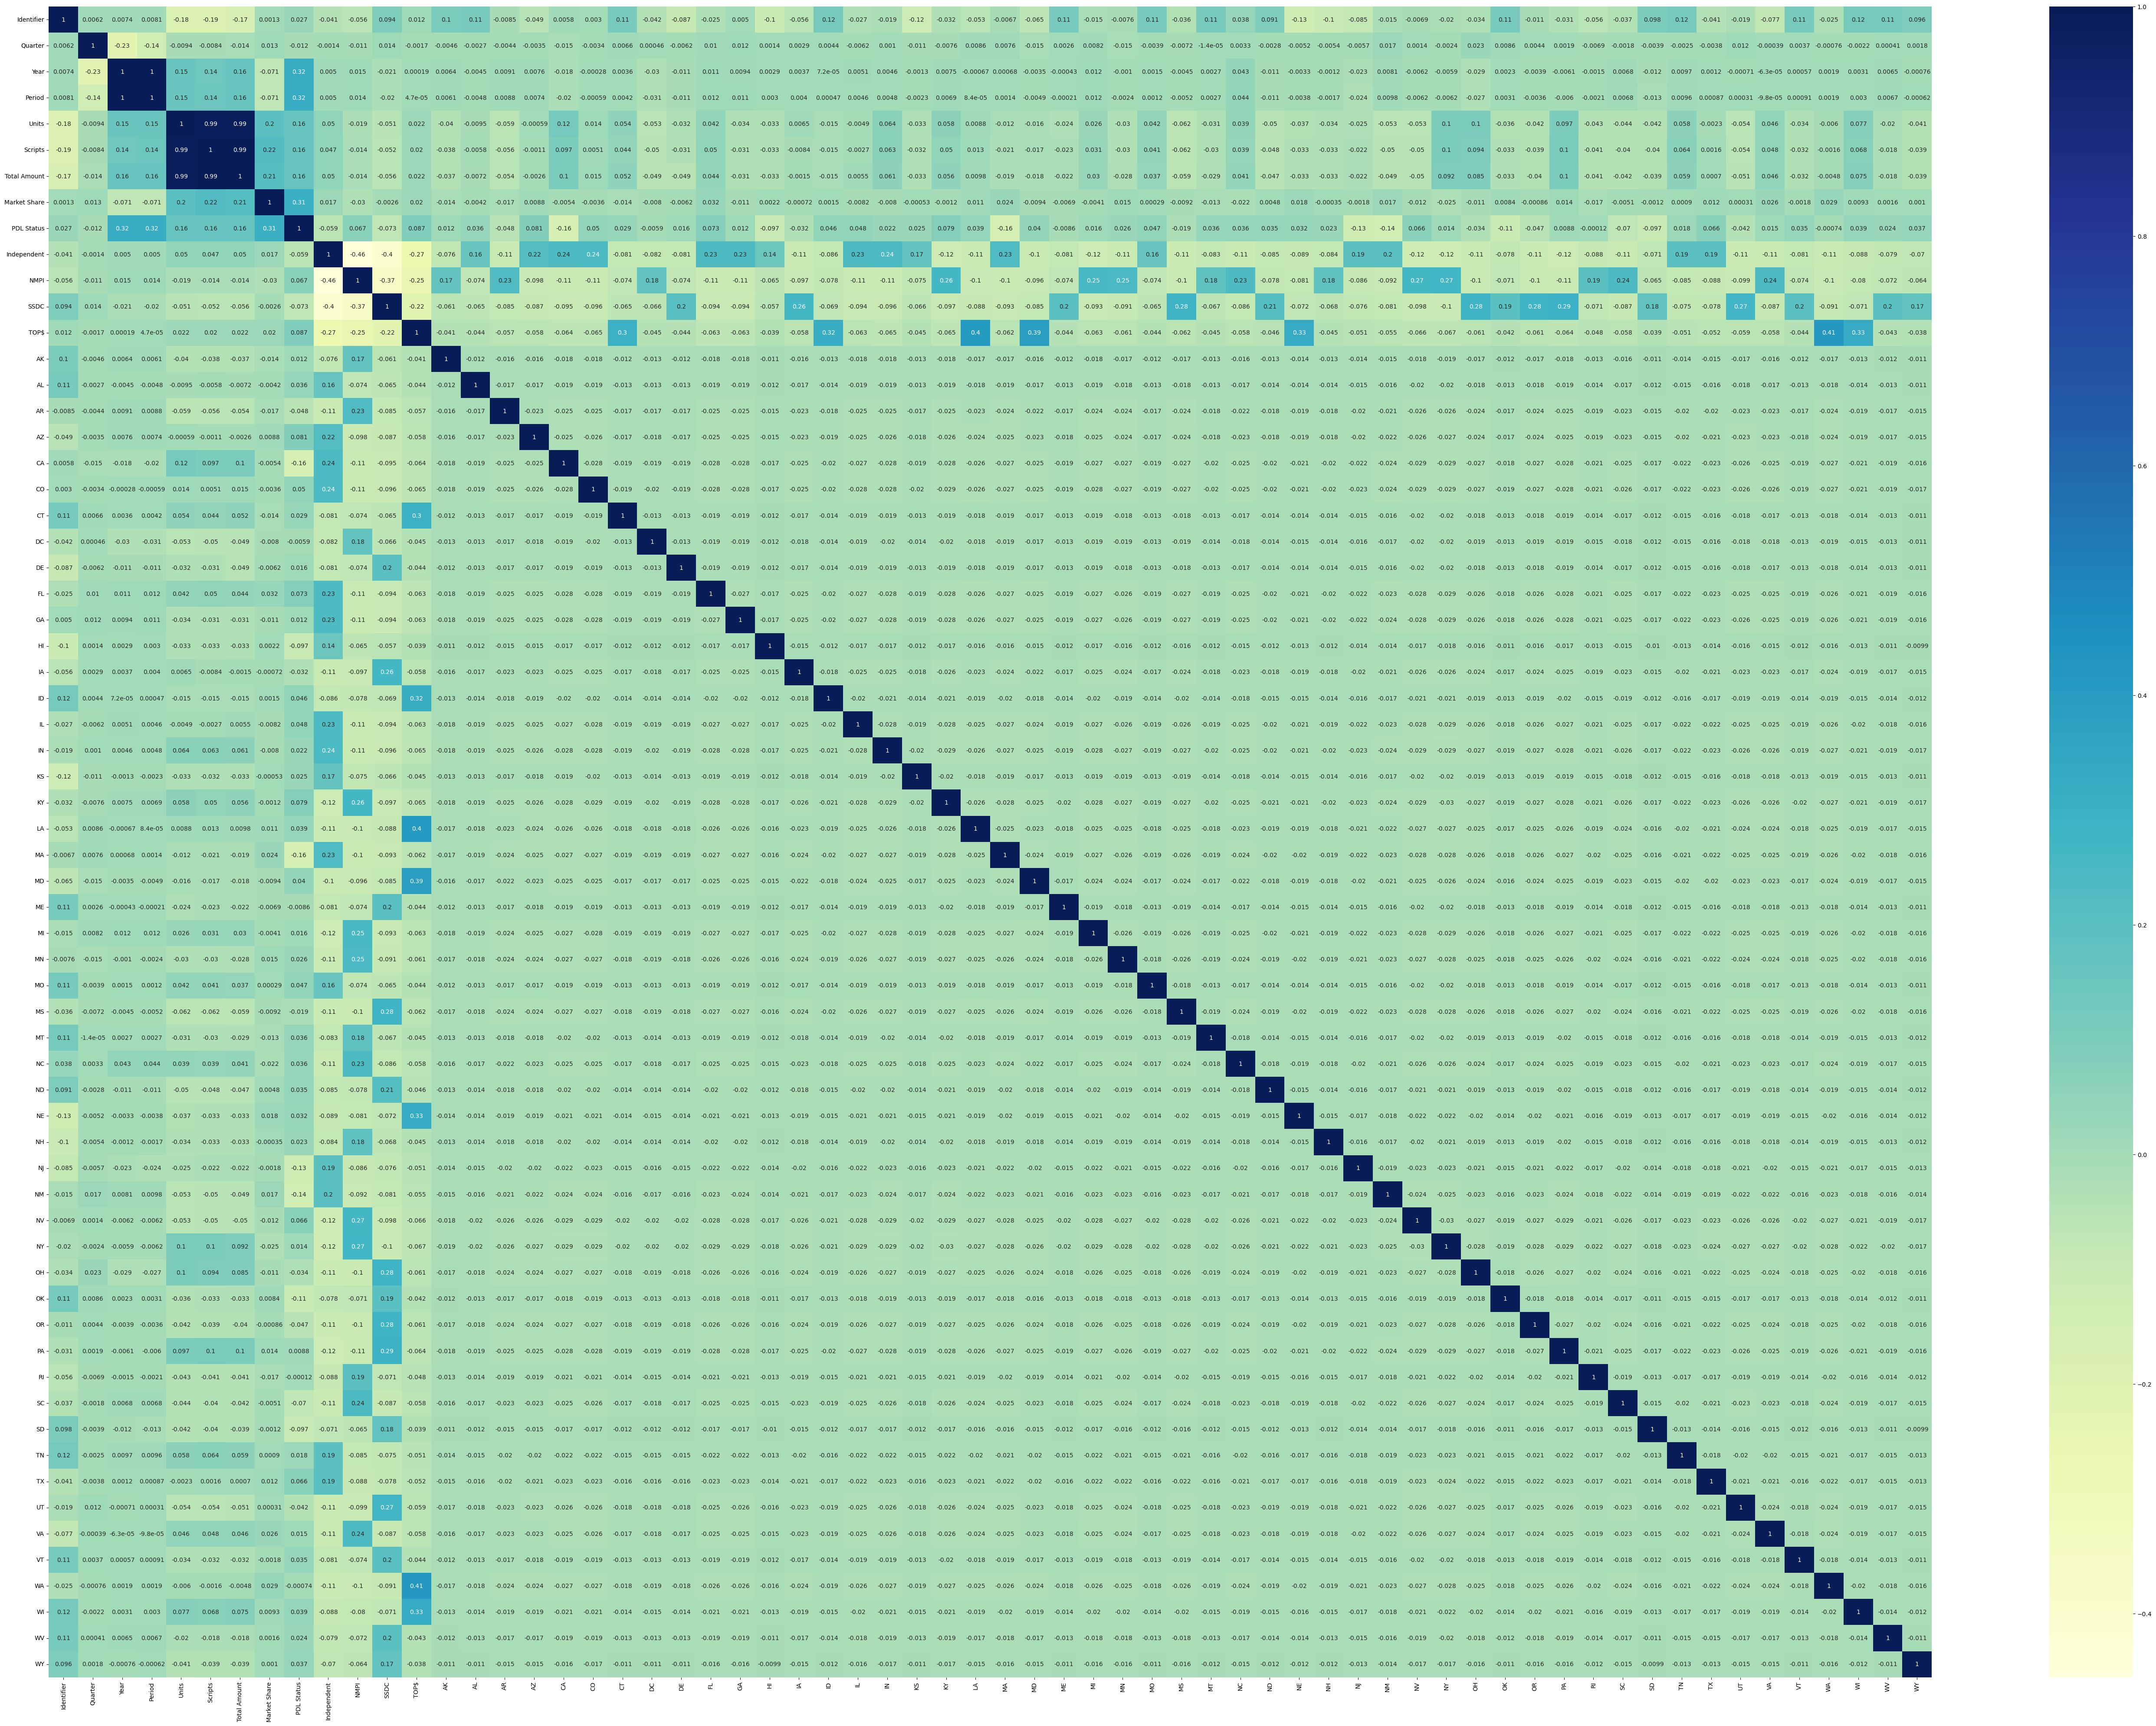

In [12]:
plt.figure(figsize=(70,50))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap='YlGnBu')

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9329446064139941

In [14]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    "n_estimators": [50, 75, 100],
    "max_features": [50,75,100]
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", return_train_score=True)

print(grid_search.fit(X_train, y_train))
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.score(X_test, y_test))

KeyboardInterrupt: 

In [15]:
model = RandomForestClassifier(max_features=100)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=100)

In [16]:
model.score(X_test, y_test)

0.9784256559766764

## Neural  Network